In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import os

In [2]:
files = {file: pd.read_csv(rf"files\{file}") for file in os.listdir("files")}

c-data-1
maxim.to_list()=[100.0, 492.0]
minim.to_list()=[0.0, -8.0]


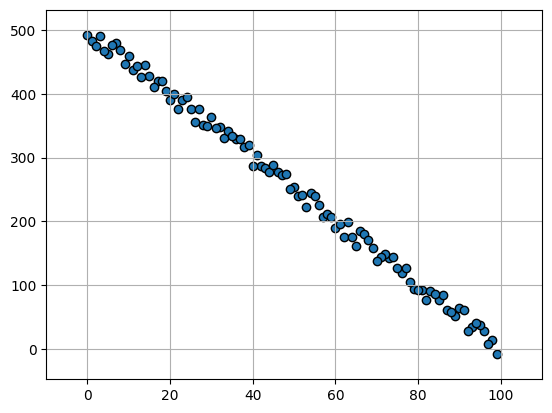

c-data-2
maxim.to_list()=[100.0, 100.0, 183.0]
minim.to_list()=[0.0, 0.0, -180.0]


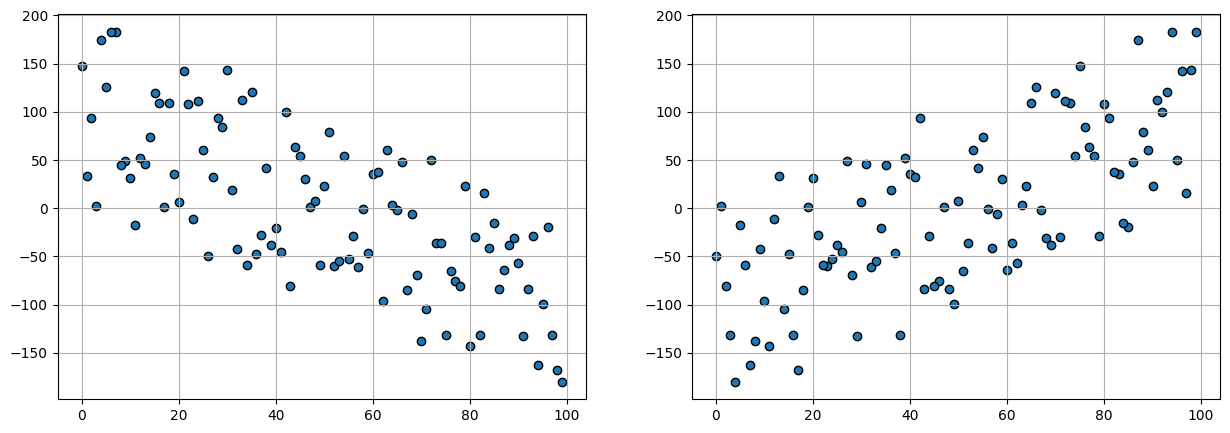

c-data-3
maxim.to_list()=[100.0, 100.0, 100.0, 1498.0]
minim.to_list()=[0.0, 0.0, 0.0, 100.0]


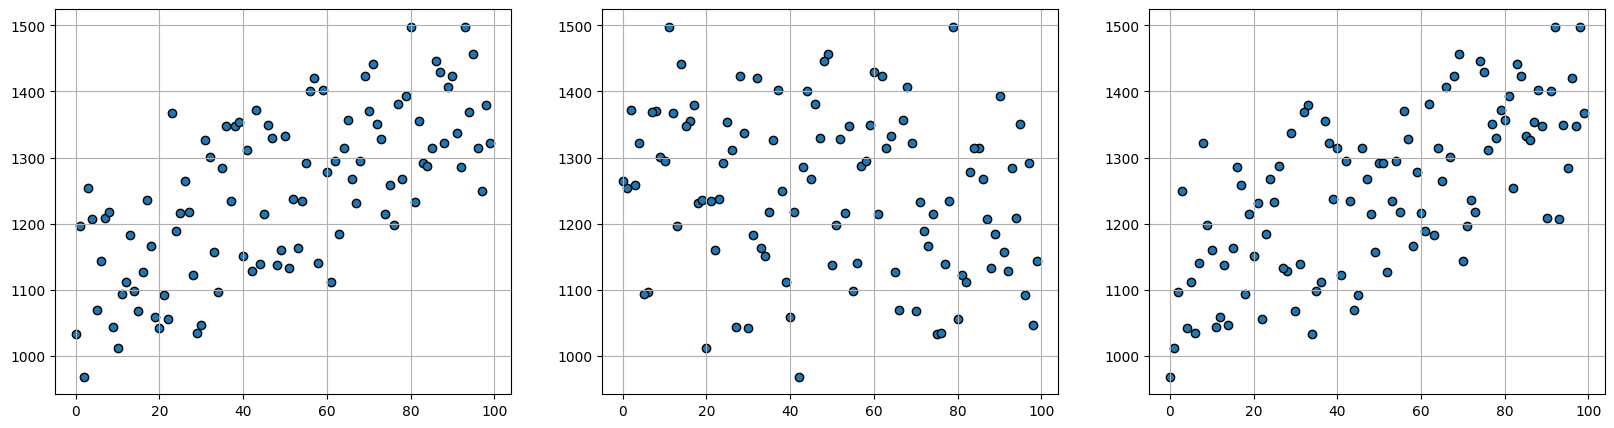

c-data-4
maxim.to_list()=[100.0, 100.0, 100.0, 100.0, 114.38502939412547]
minim.to_list()=[0.0, 0.0, 0.0, 0.0, -487.0]


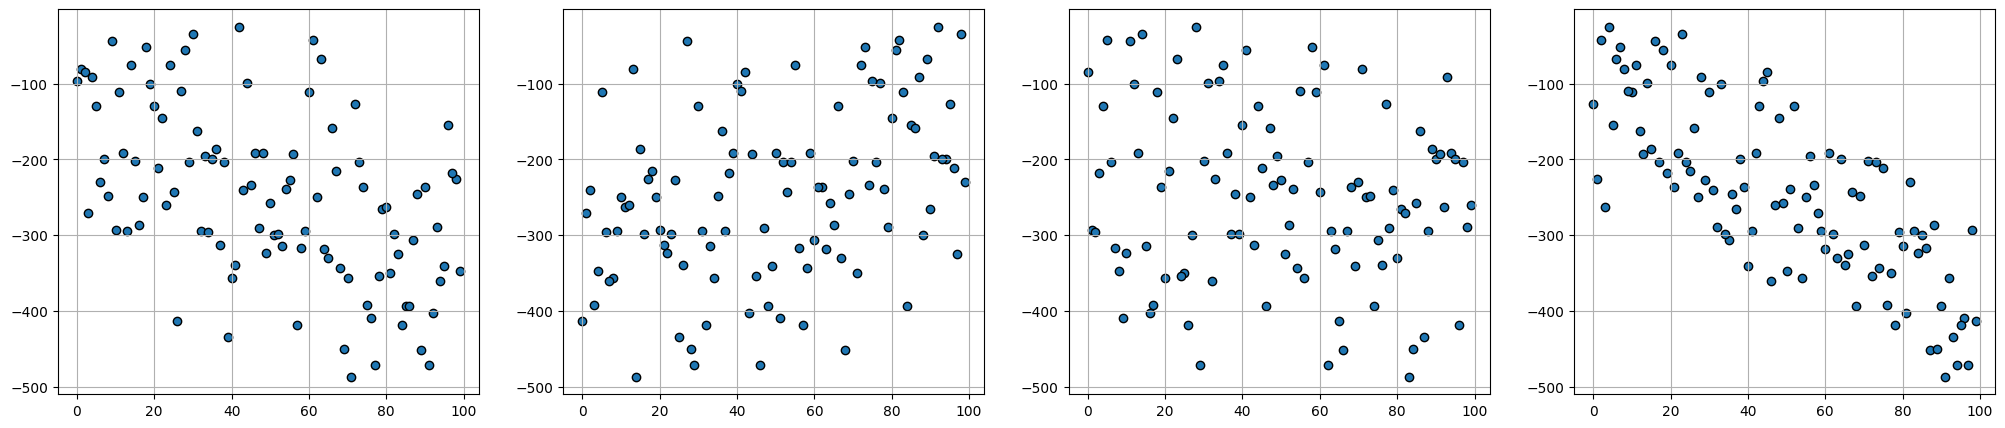

c-data-5
maxim.to_list()=[100.0, 100.0, 100.0, 100.0, 100.0, 481.0]
minim.to_list()=[0.0, 0.0, 0.0, 0.0, 0.0, -142.0]


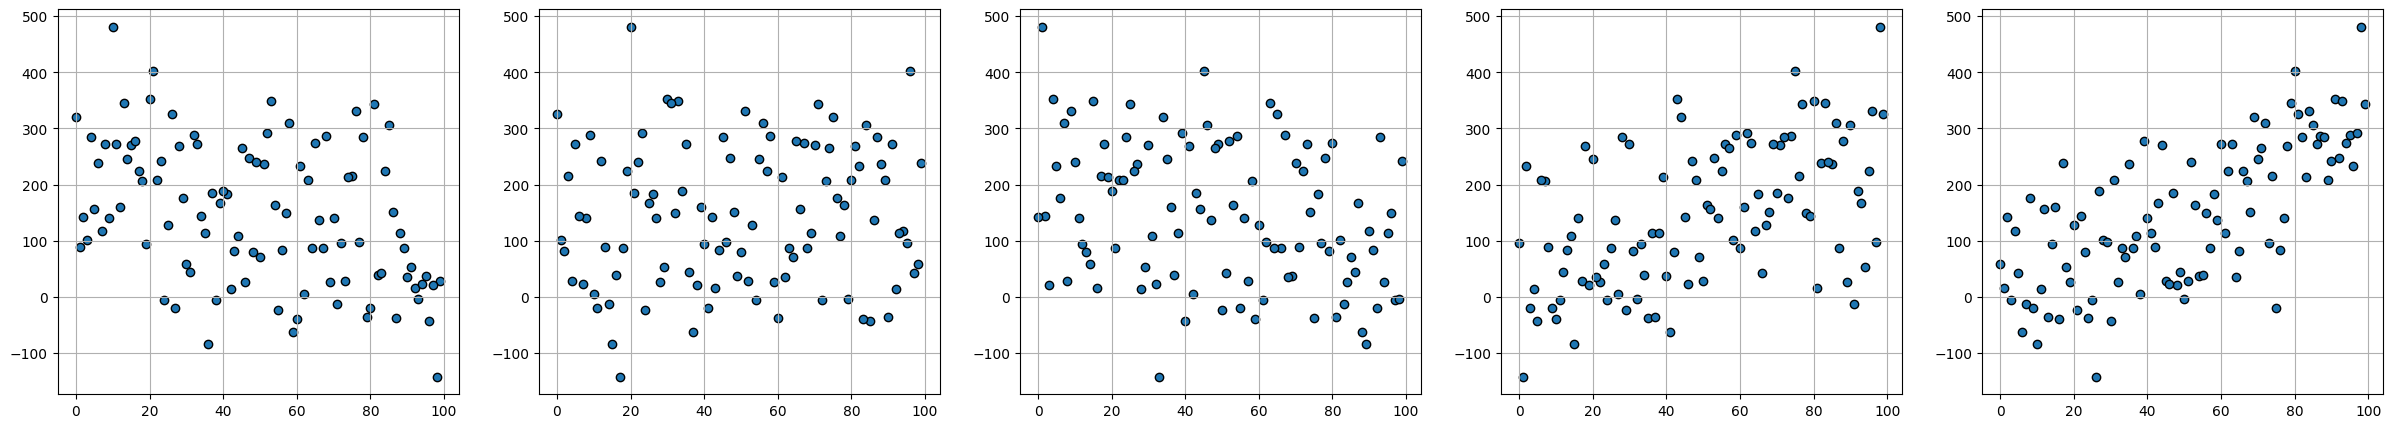

In [3]:
for file, df in files.items():
	describe = df.describe()
	maxim = describe.max()
	minim = describe.min()

	print(
		f"{file[:-4]}",
		f"{maxim.to_list()=}",
		f"{minim.to_list()=}",
		sep="\n"
	)

	columns = df.columns
	y = df[columns[-1]]
	
	if len(columns) == 2:
		fig, ax = plt.subplots()
		x = df[columns[0]]
		# ax.plot(x, y, "o", markersize=3)
		ax.scatter(x, y, edgecolors="black")
		ax.set_xlim(minim.x1 - 10, maxim.x1 + 10)
		ax.set_ylim(minim.y - 40, maxim.y + 40)
		plt.grid()

	else:
		fig, ax = plt.subplots(
			1, 
			len(columns) - 1, 
			figsize=(len(columns) * 5, 5)
		)

		for i, column in enumerate(columns[:-1]):
			x = df[column]
			# ax[i].plot(x, y, "o")
			ax[i].scatter(x, y, edgecolors="black")
			ax[i].grid()
	
	plt.show()

c-data-1.csv
model_T.score(x, y)=0.9956487003314992
model_F.score(x, y)=-2.0685002414761327
model_T.coef_=array([[-4.97666367]])
model_F.coef_=array([[2.56516827]])
model_T.intercept_=array([500.27485149])
model_F.intercept_=0.0


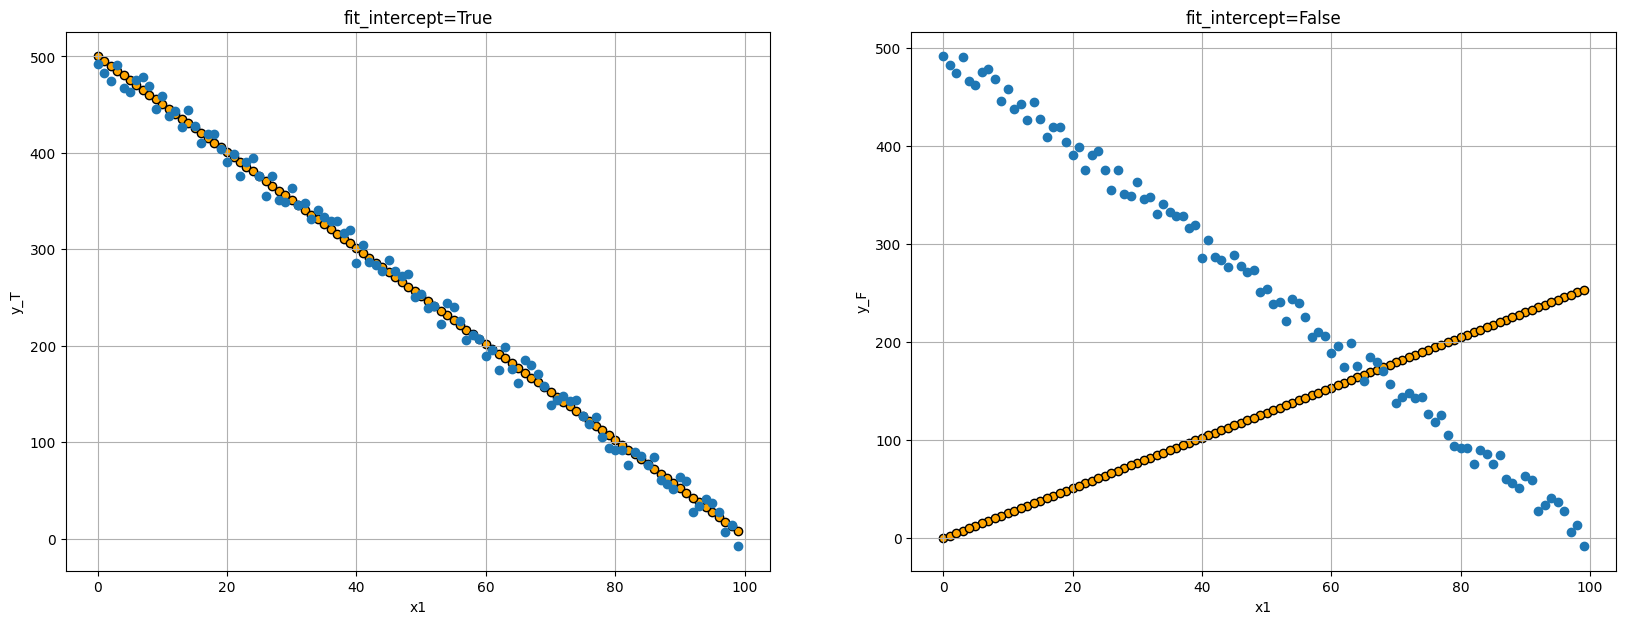

c-data-2.csv
model_T.score(x, y)=0.9894134200860933
model_F.score(x, y)=0.9891723443076583
model_T.coef_=array([[-2.04494435,  1.97795595]])
model_F.coef_=array([[-2.01598152,  2.00691878]])
model_T.intercept_=array([3.35592561])
model_F.intercept_=0.0


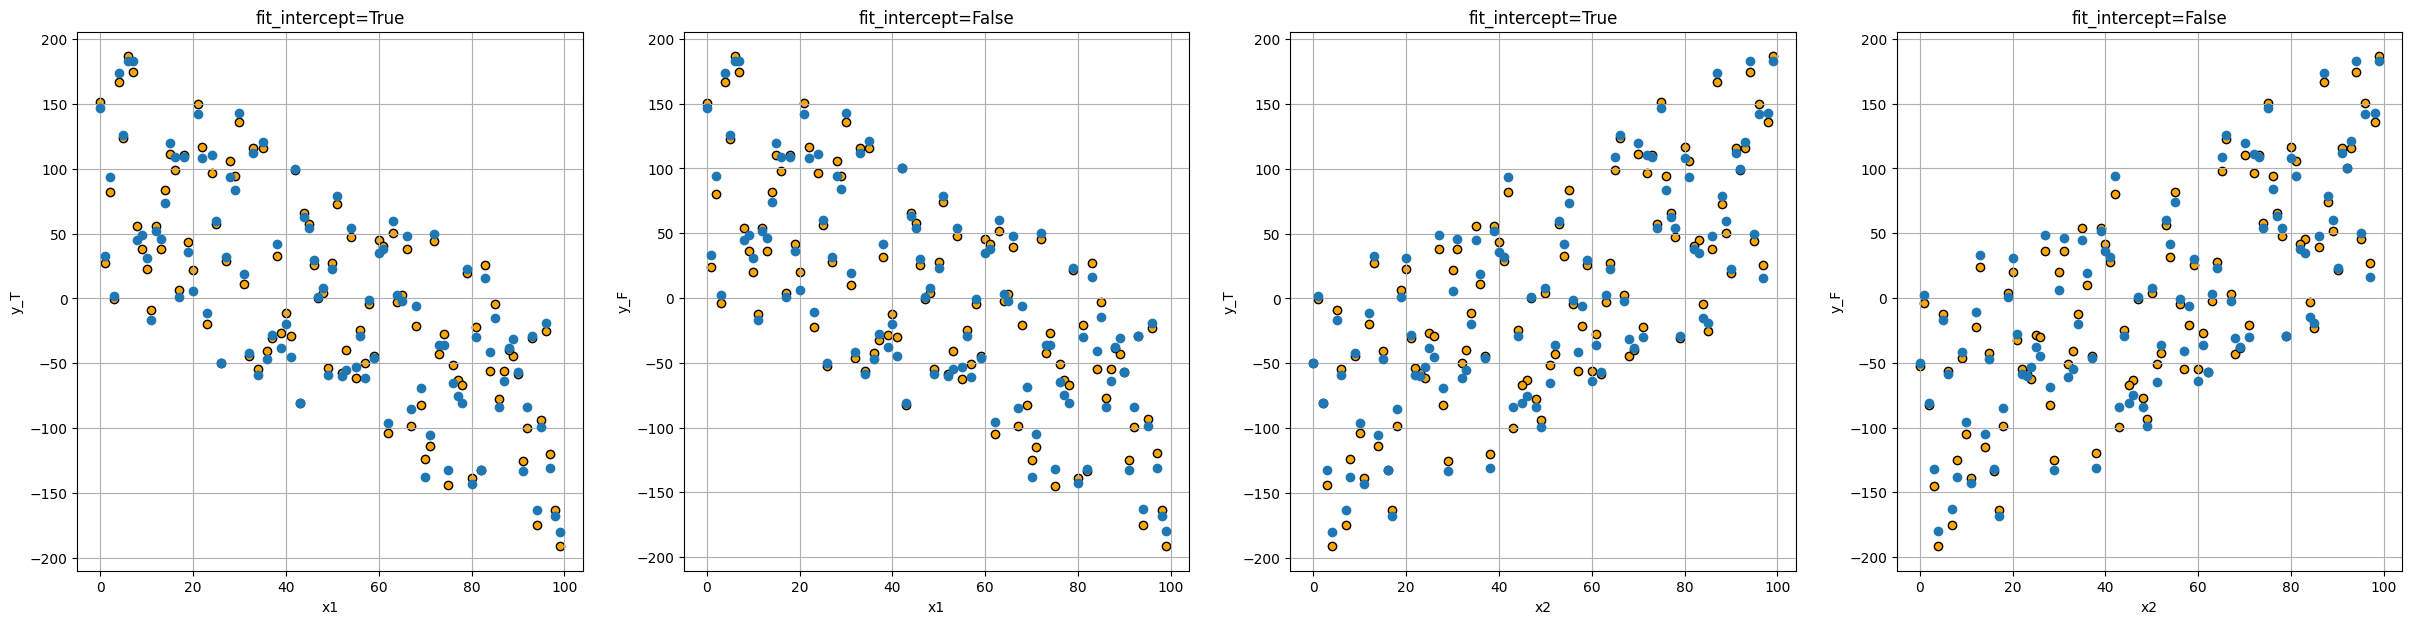

c-data-3.csv
model_T.score(x, y)=0.9943291185745392
model_F.score(x, y)=-5.763911139289337
model_T.coef_=array([[ 2.98107138, -0.97487705,  2.98460455]])
model_F.coef_=array([[9.21397153, 4.87469708, 9.07380501]])
model_T.intercept_=array([1001.02545515])
model_F.intercept_=0.0


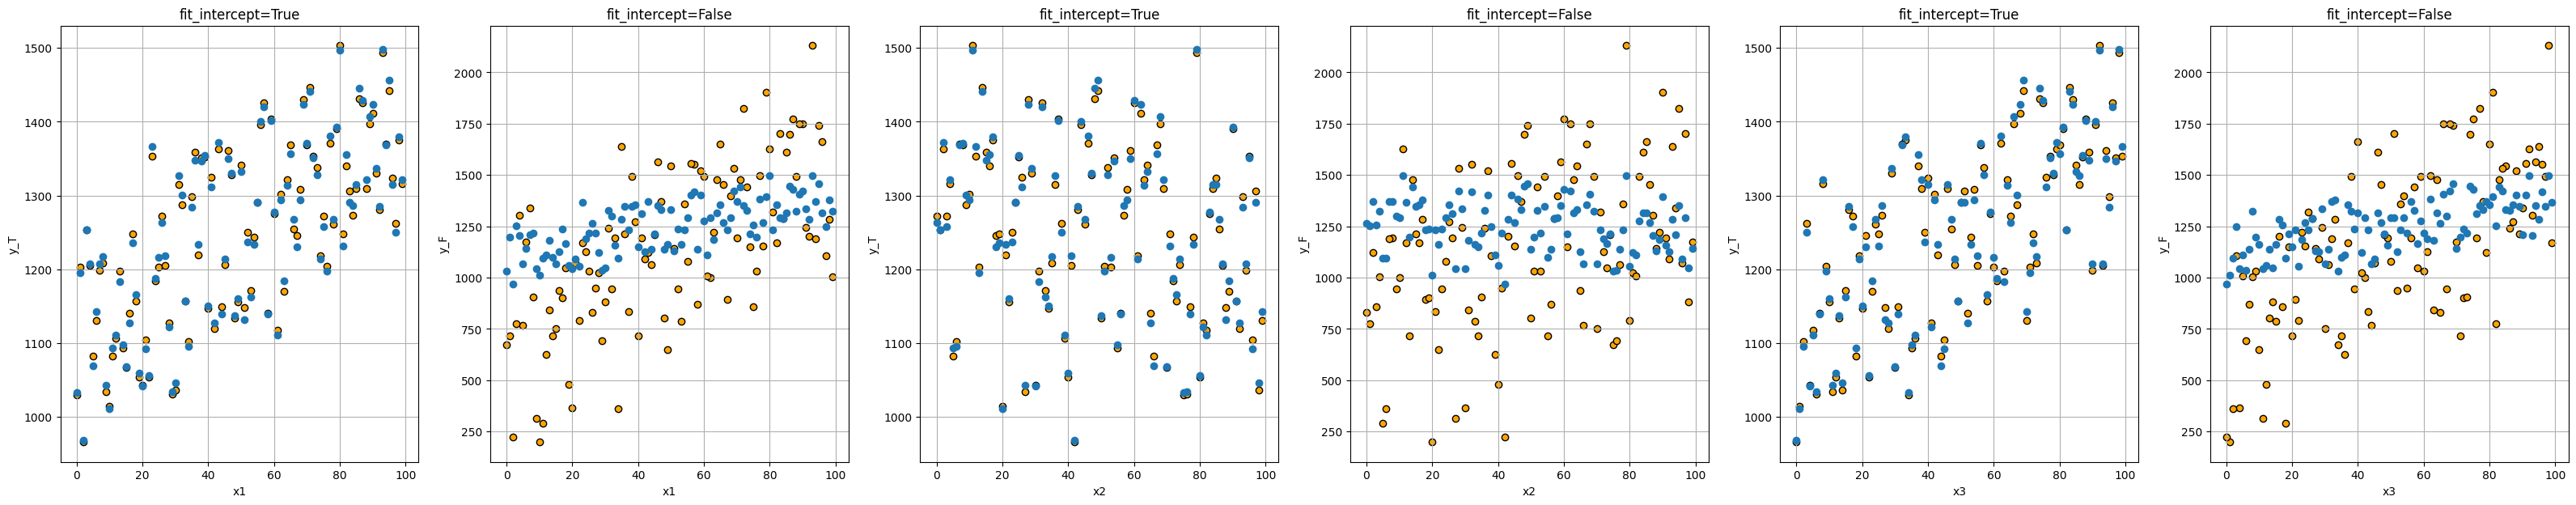

c-data-4.csv
model_T.score(x, y)=0.9936016075721295
model_F.score(x, y)=0.9934816392444651
model_T.coef_=array([[-2.06694315,  1.01928329, -1.04124818, -3.00520648]])
model_F.coef_=array([[-2.04697279,  1.04173819, -1.01892382, -2.97998678]])
model_T.intercept_=array([4.77866857])
model_F.intercept_=0.0


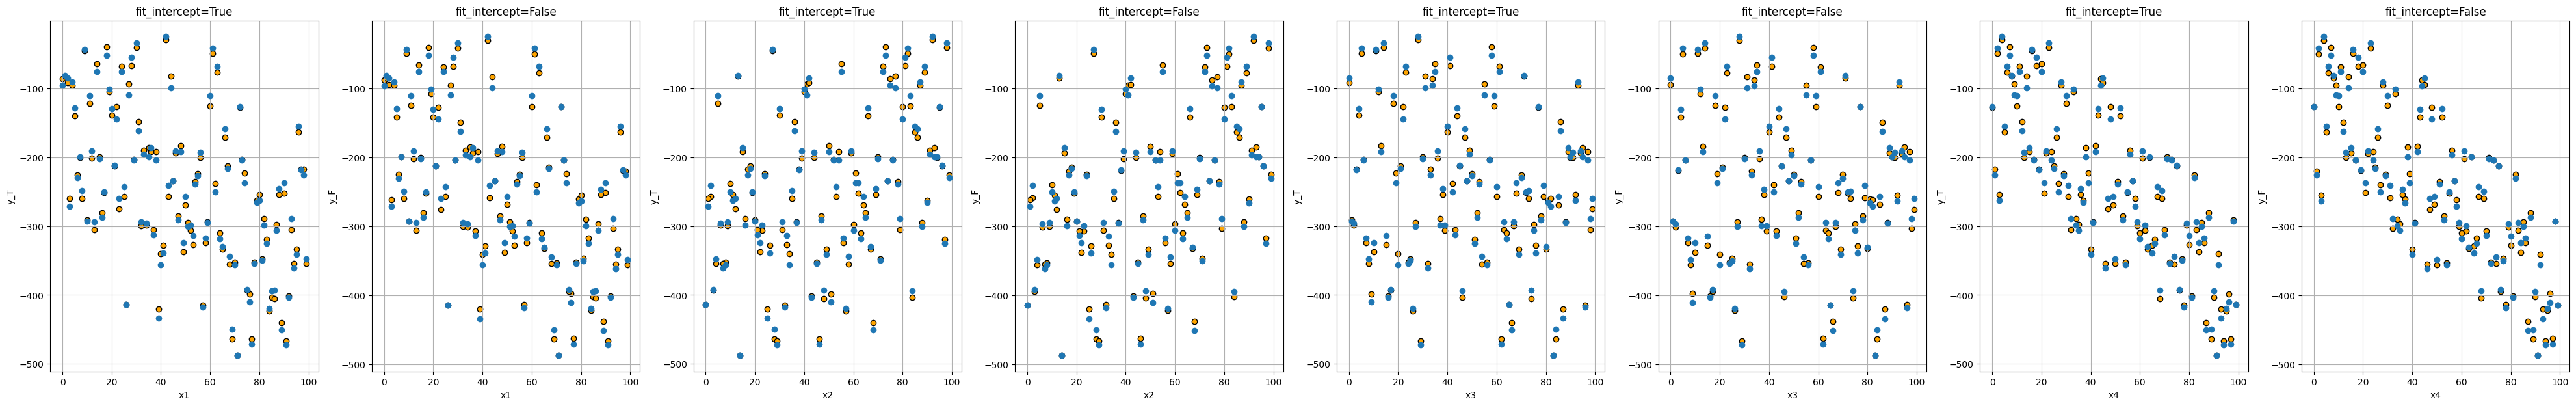

c-data-5.csv
model_T.score(x, y)=0.9952356412259993
model_F.score(x, y)=0.9951632196970357
model_T.coef_=array([[-2.01260421,  1.0253251 , -0.99267159,  2.00772316,  3.02579033]])
model_F.coef_=array([[-2.02712972,  1.0062269 , -1.01071995,  1.98911875,  3.00980515]])
model_T.intercept_=array([-4.52135855])
model_F.intercept_=0.0


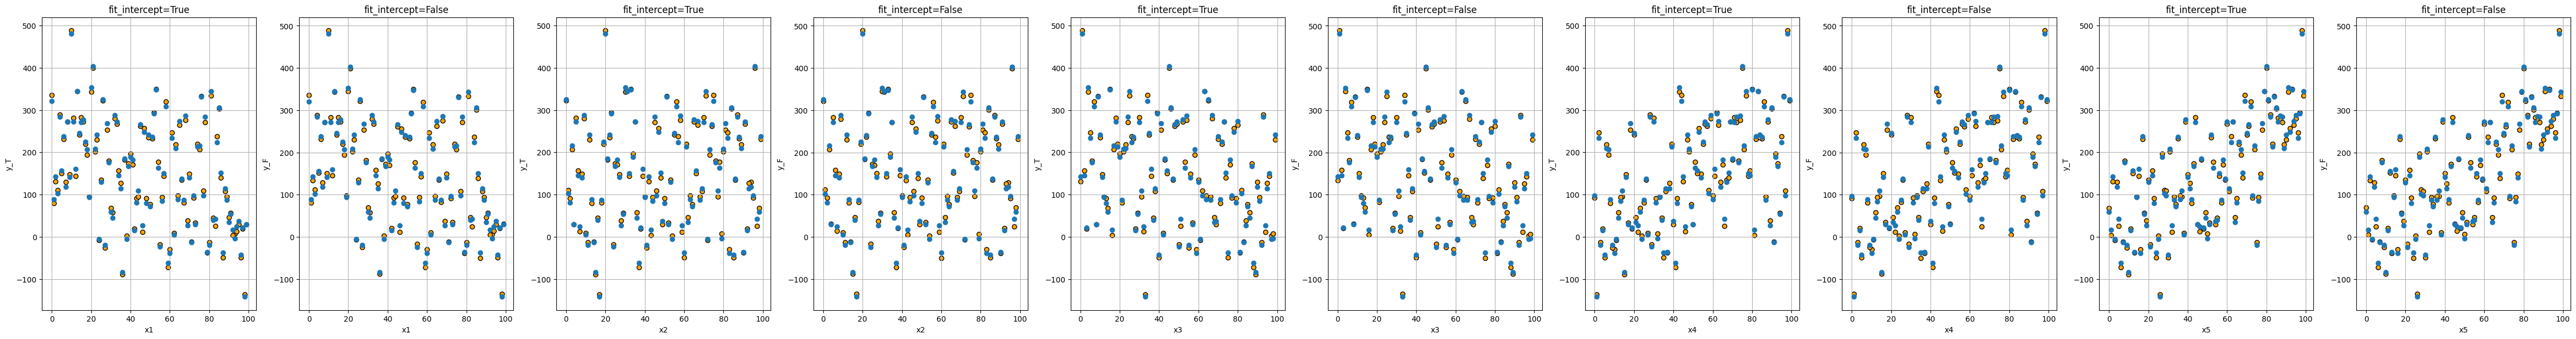

In [4]:
for file, df in files.items():
	df_numpy = df.to_numpy()
	x, y = df_numpy[:, :-1], df_numpy[:, -1:]
	
	model_T = LinearRegression().fit(x, y)
	model_F = LinearRegression(fit_intercept=False).fit(x, y)

	print(
		file,
		f"{model_T.score(x, y)=}",
		f"{model_F.score(x, y)=}",
		f"{model_T.coef_=}",
		f"{model_F.coef_=}",
		f"{model_T.intercept_=}",
		f"{model_F.intercept_=}",
		sep="\n"
	)

	y_T, y_F = model_T.predict(x), model_F.predict(x)
	columns = df.columns

	fig, ax = plt.subplots(
		1, 
		(len(columns) - 1) * 2, 
		figsize=(len(columns) * 10, 7)
	)

	for i, column in enumerate(columns[:-1]):
		x = df[column]
		ax[i + i].set_title("fit_intercept=True")
		ax[i + i].set_xlabel(f"{column}")
		ax[i + i].set_ylabel("y_T")
		ax[i + i].plot(x, y, "o", )
		ax[i + i].scatter(x, y_T, c="orange", edgecolor="black")
		ax[i + i].grid()
			
		ax[i + i + 1].set_title("fit_intercept=False")
		ax[i + i + 1].set_xlabel(f"{column}")
		ax[i + i + 1].set_ylabel("y_F")
		ax[i + i + 1].plot(x, y, "o")
		ax[i + i + 1].scatter(x, y_F, c="orange", edgecolor="black")
		ax[i + i + 1].grid()
	
	plt.show()
